In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.dataset_generator import DatasetGenerator
%matplotlib inline
sns.set_style('whitegrid')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
from src.data.entsoe_data_getter import *
import statsmodels.api as sm

### Get the dataset

And set Time as index

In [2]:
dg = DatasetGenerator(['all'])
dataset = dg.get_dataset('2016-01-01', '2021-05-31', 'T23')
dataset.set_index('Time', inplace=True)
date_min = dataset.index.min()
date_max = dataset.index.max()
print(dataset.head())
print('Minimum date from data set: {}'.format(date_min))
print('Maximum date from data set: {}'.format(date_max))

                     SPOTPrice  temp  dwpt  rhum  prcp  wspd    pres  tsun
Time                                                                      
2016-01-01 00:00:00      23.86   5.2   4.9  98.0   0.1   1.4  1026.6   0.0
2016-01-01 01:00:00      22.39   4.7   4.6  99.0   0.0   3.2  1026.4   0.0
2016-01-01 02:00:00      20.59   3.8   3.7  99.0   0.5   4.3  1026.9   0.0
2016-01-01 03:00:00      16.81   4.0   3.9  99.0   0.5   4.0  1027.4   0.0
2016-01-01 04:00:00      17.41   4.0   3.9  99.0   0.6   4.0  1027.5   0.0
Minimum date from data set: 2016-01-01 00:00:00
Maximum date from data set: 2021-05-31 23:00:00


EntsoeDataGetter is still not included in master branch so need to be added manually

In [3]:
eg = EntsoeDataGetter()
entsoe_data = eg.get_data(start_date='2021-01-01',
                              end_date='2021-05-31', end_time='T23')

In [4]:
entsoe_data.set_index('Time', inplace=True)

In [5]:
dataset_all = pd.concat([dataset['2021-01-01':'2021-05-31'], entsoe_data], axis=1)

In [6]:
dataset_all.head()

SPOTPrice  temp  dwpt  rhum  prcp  wspd    pres  tsun  \
Time                                                                         
2021-01-01 00:00:00      50.87   0.1  -4.5  71.0   0.0   6.8  1007.3   0.0   
2021-01-01 01:00:00      48.19  -0.9  -5.0  74.0   0.0   6.8  1007.5   0.0   
2021-01-01 02:00:00      44.68  -0.8  -5.0  73.0   0.0   5.4  1007.3   0.0   
2021-01-01 03:00:00      42.92  -0.6  -5.4  70.0   0.0   4.0  1007.1   0.0   
2021-01-01 04:00:00      40.39  -1.3  -5.0  76.0   0.0   3.6  1007.1   0.0   

                         Load  Solar  Wind Offshore  Wind Onshore  
Time                                                               
2021-01-01 00:00:00  45870.25    0.0         421.75       4662.00  
2021-01-01 01:00:00  45094.50    0.0         381.50       3968.00  
2021-01-01 02:00:00  43308.50    0.0         392.25       3614.50  
2021-01-01 03:00:00  41598.00    0.0         303.75       3270.00  
2021-01-01 04:00:00  40745.25    0.0         317.50       2827.75

### Overview

Get an overview on data over the years. Resample data to monthly mean.

In [7]:
dataset_res_month = dataset.resample('MS').mean()

In [8]:
dataset_res_month.head()

SPOTPrice       temp      dwpt       rhum      prcp       wspd  \
Time                                                                         
2016-01-01  29.036371   2.734409 -0.671640  79.720430  0.125134  10.933871   
2016-02-01  21.989555   4.934195 -0.051724  71.962644  0.109339  14.268678   
2016-03-01  24.297245   4.952285 -0.105376  71.841398  0.060618  10.328629   
2016-04-01  24.213486   9.560694  3.399028  68.227778  0.086389   9.643333   
2016-05-01  22.542366  13.471102  7.467070  70.245968  0.160215  10.791129   

                   pres       tsun  
Time                                
2016-01-01  1016.550739   5.236559  
2016-02-01  1013.284914   5.198276  
2016-03-01  1015.257392   9.756720  
2016-04-01  1013.285972  13.030556  
2016-05-01  1013.331855  15.149194

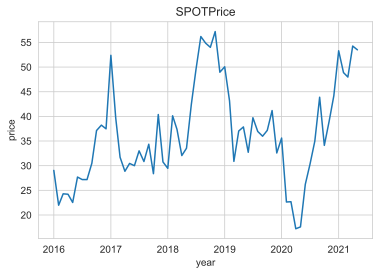

In [9]:
plt.figure()
sns.lineplot(x='Time',y='SPOTPrice',data=dataset_res_month)
plt.title('SPOTPrice',fontsize=12)
plt.xlabel('year',fontsize=10)
plt.ylabel('price',fontsize=10)
plt.show()

Decomposition: Show trend, seasonality and residual of monthly mean spotprice

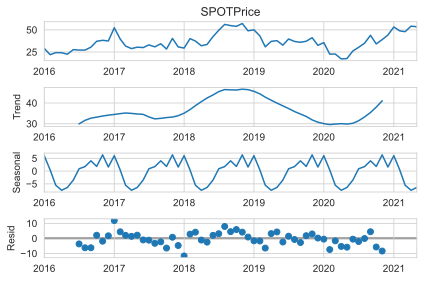

In [10]:
decomposition_add = sm.tsa.seasonal_decompose(dataset_res_month["SPOTPrice"], period=12, model="additive")
# comment: seasonal_decompose expects index to be datetime format
fig = decomposition_add.plot()
plt.show()

Decomposition: Show seasonality and trend during the day in a timeframe of some days

In [11]:
new_dataset_hourly=dataset["2020-09-01":"2020-09-10"]

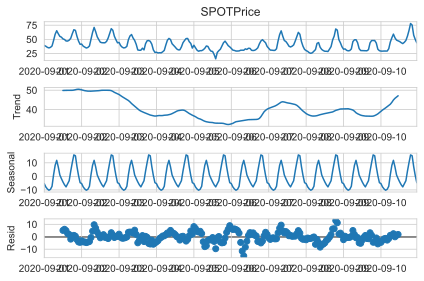

In [13]:
decomposition_add = sm.tsa.seasonal_decompose(new_dataset_hourly["SPOTPrice"], period=24, model="additive")
fig = decomposition_add.plot()
plt.show()

Decomposition: Show the weekly seasonality and trend

In [14]:
dataset_res_day = dataset["2020-08"].resample('D').mean()

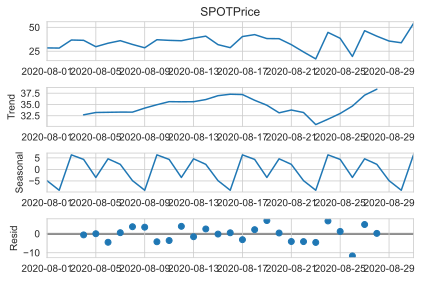

In [15]:
decomposition_add = sm.tsa.seasonal_decompose(dataset_res_day["SPOTPrice"], period=7, model="additive")
fig = decomposition_add.plot()
plt.show()

### Lagplot

Lag plot on hourly data. Shows how the data depends on data on timestep before

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

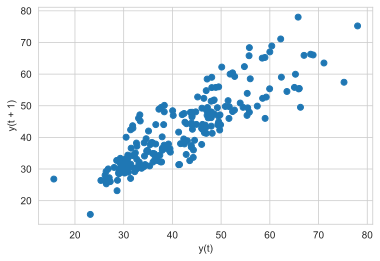

In [16]:
from pandas.plotting import lag_plot

lag_plot(new_dataset_hourly["SPOTPrice"])

### Autocorrelation and partial autocorrelation of Spotprice

AC and PCF for daily mean spot price. Shows a correlation between the current day and the same day one week ago. -> same weekdays have similar spotprices

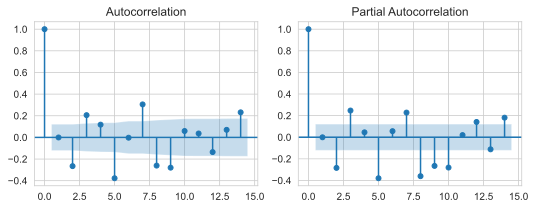

In [17]:
import statsmodels.tsa.api as smt

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(7.5)
fig.set_figheight(3)
smt.graphics.plot_acf(dataset_res_day['SPOTPrice'], lags=14, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(dataset_res_day['SPOTPrice'], lags=14, ax=axes[1], alpha=0.5)
plt.tight_layout()

AC and PCF for hourly spot price. Shows the seasonality over the day.

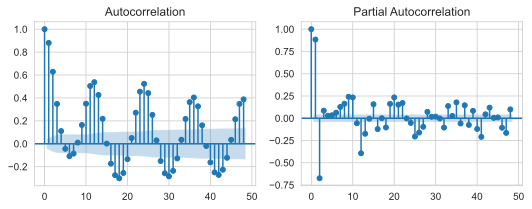

In [18]:
import statsmodels.tsa.api as smt

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(7.5)
fig.set_figheight(3)
smt.graphics.plot_acf(new_dataset_hourly['SPOTPrice'], lags=48, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(new_dataset_hourly['SPOTPrice'], lags=48, ax=axes[1], alpha=0.5)
plt.tight_layout()

Plot data for one day

In [19]:
data_oneday=dataset["2020-09-04"]

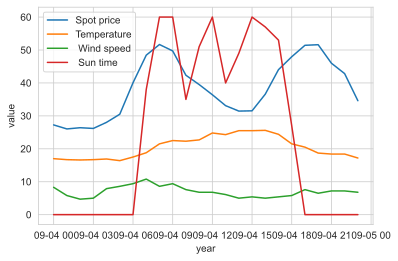

In [20]:
plt.figure()
sns.lineplot(x='Time',y='SPOTPrice',data=data_oneday, label = "Spot price")
sns.lineplot(x='Time',y='temp',data=data_oneday, label = "Temperature")
sns.lineplot(x='Time',y='wspd',data=data_oneday, label = " Wind speed")
sns.lineplot(x='Time',y='tsun',data=data_oneday, label = " Sun time")
plt.xlabel('year',fontsize=10)
plt.ylabel('value',fontsize=10)
plt.show()

Scatter plot of spot price and each weather data. 
Not really a correlation between the weather values and the spotprice.

In [21]:
year = "2021"
fig, axes = plt.subplots(4,2)
fig.set_figwidth(8)
fig.set_figheight(16)
axes[0,0].scatter(dataset[year][["temp"]],dataset[year][["SPOTPrice"]])
axes[0,0].set_xlabel('The air temperature in °C')
axes[0,1].scatter(dataset[year][["dwpt"]],dataset[year][["SPOTPrice"]])
axes[0,1].set_xlabel('The dew point in °C')
axes[1,0].scatter(dataset[year][["rhum"]],dataset[year][["SPOTPrice"]])
axes[1,0].set_xlabel('The relative humidity in percent %')
axes[1,1].scatter(dataset[year][["prcp"]],dataset[year][["SPOTPrice"]])
axes[1,1].set_xlabel('The one hour precipitation total in mm')
axes[2,0].scatter(dataset[year][["wspd"]],dataset[year][["SPOTPrice"]])
axes[2,0].set_xlabel('The average wind speed in km/h')
axes[2,1].scatter(dataset[year][["pres"]],dataset[year][["SPOTPrice"]])
axes[2,1].set_xlabel('The average sea-level air pressure in hPa')
axes[3,0].scatter(dataset[year][["tsun"]],dataset[year][["SPOTPrice"]])
axes[3,0].set_xlabel('The one hour sunshine total in minutes (m)')
plt.tight_layout()

Scatter plot of spot price and each Entsoe data

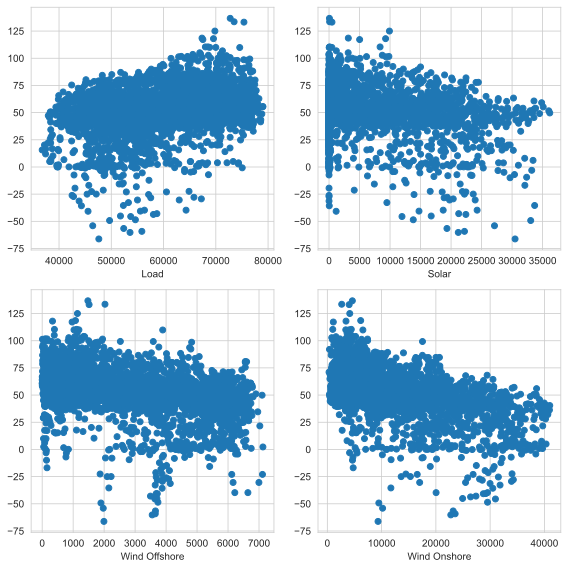

In [22]:
year = "2021"
fig, axes = plt.subplots(2,2)
fig.set_figwidth(8)
fig.set_figheight(8)
axes[0,0].scatter(dataset_all[year][["Load"]],dataset[year][["SPOTPrice"]])
axes[0,0].set_xlabel('Load')
axes[0,1].scatter(dataset_all[year][["Solar"]],dataset[year][["SPOTPrice"]])
axes[0,1].set_xlabel('Solar')
axes[1,0].scatter(dataset_all[year][["Wind Offshore"]],dataset[year][["SPOTPrice"]])
axes[1,0].set_xlabel('Wind Offshore')
axes[1,1].scatter(dataset_all[year][["Wind Onshore"]],dataset[year][["SPOTPrice"]])
axes[1,1].set_xlabel('Wind Onshore')

plt.tight_layout()

<AxesSubplot:>

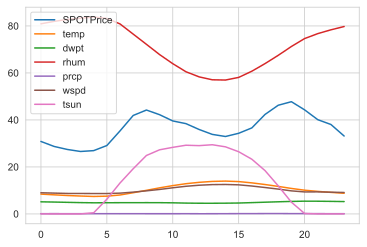

<AxesSubplot:xlabel='Time'>

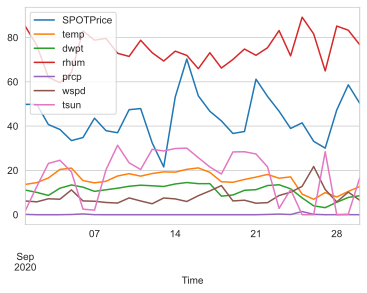

<AxesSubplot:xlabel='Time'>

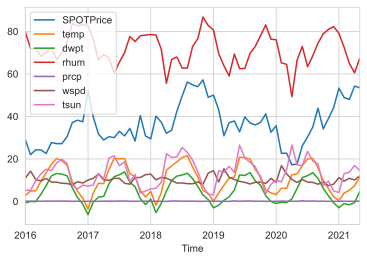

Since the time of the day is important for the day ahead and week ahead prediction, we are only taking values at that specific time. (i.e. 9:00 am)

In [27]:
time = 9
dataset_time = dataset[dataset.index.hour==time]

<AxesSubplot:xlabel='Time'>

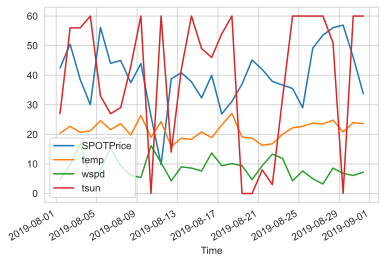

In [29]:
dataset_time["2019-08"].drop(["pres","dwpt","prcp","rhum"], axis=1).plot()

Decomposition for 9:00 am values

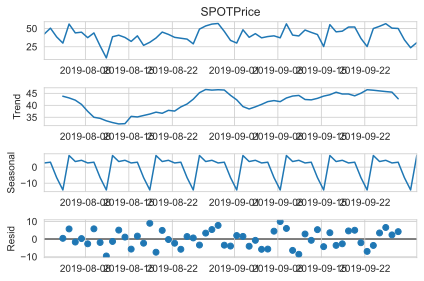

In [31]:
dataset_time_timeframe = dataset_time["2019-08":"2019-09"]
decomposition_add = sm.tsa.seasonal_decompose(dataset_time_timeframe["SPOTPrice"], period=7, model="additive")
fig = decomposition_add.plot()
plt.show()

Differencing the spot price

In [48]:
dataset['diff'] = dataset['SPOTPrice'].diff()

<AxesSubplot:xlabel='Time'>

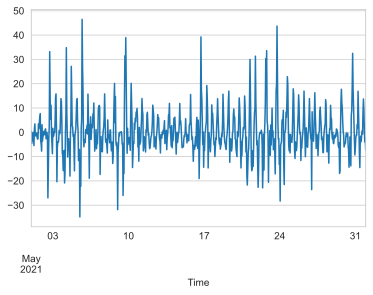

In [49]:
dataset["2021-05"]["diff"].plot()

Crosscorrelation between spot price and weather data. Each row represents the lag of the correlation (first row: no lag, second row: lag = 1 etc.)

In [50]:
data_cc = dataset["2019-09-01":"2019-09-03"]
df_cc = pd.DataFrame()
df_cc["temp_cc"]=sm.tsa.stattools.ccf(data_cc["SPOTPrice"], data_cc["temp"], adjusted=False)
df_cc["dwpt_cc"]=sm.tsa.stattools.ccf(data_cc["SPOTPrice"], data_cc["dwpt"], adjusted=False)
df_cc["rhum_cc"]=sm.tsa.stattools.ccf(data_cc["SPOTPrice"], data_cc["rhum"], adjusted=False)
df_cc["prcp_cc"]=sm.tsa.stattools.ccf(data_cc["SPOTPrice"], data_cc["prcp"], adjusted=False)
df_cc["wspd_cc"]=sm.tsa.stattools.ccf(data_cc["SPOTPrice"], data_cc["wspd"], adjusted=False)
df_cc["tsun_cc"]=sm.tsa.stattools.ccf(data_cc["SPOTPrice"], data_cc["tsun"], adjusted=False)


In [51]:
df_cc

temp_cc   dwpt_cc   rhum_cc   prcp_cc   wspd_cc   tsun_cc
0  -0.321834 -0.138083  0.170734  0.225962 -0.254379 -0.213480
1  -0.270873 -0.149456  0.121605  0.275825 -0.203850 -0.133879
2  -0.210305 -0.199817  0.046907  0.229066 -0.181802 -0.073268
3  -0.148248 -0.255115 -0.026309  0.137445 -0.207447 -0.021145
4  -0.096546 -0.291632 -0.078171  0.079234 -0.244390  0.017629
..       ...       ...       ...       ...       ...       ...
67  0.044558  0.031613 -0.035320 -0.022676  0.028421 -0.062823
68  0.033010  0.023717 -0.025310 -0.015827  0.013582 -0.043848
69  0.016983  0.012544 -0.012663 -0.007907  0.004927 -0.021906
70  0.007001  0.005251 -0.005046 -0.003084  0.001062 -0.008543
71  0.001192  0.000894 -0.000845 -0.000505  0.000087 -0.001400

[72 rows x 6 columns]

Crosscorrelation between Spot price and Entsoe data.
Shows quite strong correlations between each data and the spot price.

In [44]:
data_cc2 = dataset_all["2021-01-10":"2021-01-10"]
df_cc2 = pd.DataFrame()
df_cc2["Load_cc"]=sm.tsa.stattools.ccf(data_cc2["SPOTPrice"], data_cc2["Load"], adjusted=False)
df_cc2["Wind Offshore_cc"]=sm.tsa.stattools.ccf(data_cc2["SPOTPrice"], data_cc2["Wind Offshore"], adjusted=False)
df_cc2["Wind Onshore_cc"]=sm.tsa.stattools.ccf(data_cc2["SPOTPrice"], data_cc2["Wind Onshore"], adjusted=False)
df_cc2["Solar"]=sm.tsa.stattools.ccf(data_cc2["SPOTPrice"], data_cc2["Solar"], adjusted=False)
df_cc2

Load_cc  Wind Offshore_cc  Wind Onshore_cc     Solar
0   0.566974          0.229926         0.343314  0.194582
1   0.452834          0.440911         0.267736  0.290023
2   0.327072          0.622191         0.174477  0.447267
3   0.205727          0.715833         0.102323  0.600251
4   0.121627          0.713667         0.030142  0.662274
5   0.066851          0.618012        -0.025696  0.609856
6   0.030031          0.533297        -0.056294  0.453220
7  -0.080392          0.253824        -0.139376  0.139917
8  -0.212123          0.014981        -0.218356 -0.186652
9  -0.340973         -0.122483        -0.267986 -0.386668
10 -0.433829         -0.136917        -0.269456 -0.420590
11 -0.458097         -0.153488        -0.278848 -0.371598
12 -0.413474         -0.161282        -0.257300 -0.270485
13 -0.364940         -0.195211        -0.234836 -0.167536
14 -0.279622         -0.285286        -0.224477 -0.108802
15 -0.186977         -0.348585        -0.212147 -0.096958
16 -0.099270         -0.397127        -0.186649 -0.085877
17 -0.026852         -0.390518        -0.147223 -0.067643
18  0.051288         -0.267345        -0.065299 -0.025421
19  0.111318         -0.063846         0.031396  0.022702
20  0.127167          0.039710         0.071143  0.042573
21  0.117626          0.133268         0.109049  0.057878
22  0.083133          0.186886         0.122285  0.062804
23  0.033021          0.228030         0.124810  0.062260